# IRIS-Flower-clustering

[Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)
Этот проект представляет собой построение искусственных нейронных сетей для классификации ирисов.


В качестве задания вам предлагается повторить данные действия для наборов данных (можно выбрать, что больше понравится, но лучше сделать для всех)
- [User Knowledge Modeling Data Set](http://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)
- [Blood Transfusion Service Center Data Set](http://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center)
- [Somerville Happiness Survey Data Set](http://archive.ics.uci.edu/ml/datasets/Somerville+Happiness+Survey)
- [Wine Quality Data Set](https://archive.ics.uci.edu/ml/datasets/wine+quality)



In [1]:
# Подключаем библиотеки
import pandas as pd # Работа с набором данных
import numpy as np # Линейная алгебра

# разделение выборки
from sklearn.model_selection import train_test_split


In [2]:
# читаем данные
url = 'https://raw.githubusercontent.com/yakushinav/omo/main/data/iris.csv'
data = pd.read_csv(url)

# Выделим признаки
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
# Выделим классификационные метки
names = data['species'].unique()

# Выделим матрицу признаков и вектор результата
X = data[feature_names]
y = data['species']


# Tensorflow

TensorFlow — открытая программная библиотека для машинного обучения, разработанная компанией Google для решения задач построения и тренировки нейронной сети с целью автоматического нахождения и классификации образов, достигая качества человеческого восприятия. Применяется как для исследований, так и для разработки собственных продуктов Google. Основной API для работы с библиотекой реализован для Python, также существуют реализации для R, C Sharp, C++, Haskell, Java, Go и Swift.

- В TensorFlow модели представлены с помощью графов — математических абстракций, которые состоят из вершин и путей между ними. Граф можно сравнить со схемой дорог между разными точками. В программировании это обычно нужно при решении «маршрутных» задач и при создании нейронных сетей.
- TensorFlow работает с тензорами — многомерными структурами данных в векторном, то есть направленном пространстве. Они используются в линейной алгебре и физике. Отсюда происходит название библиотеки. С помощью тензоров описываются пути графа, а вершины — это математические операции.
- Вычисления в TensorFlow выражаются как потоки данных через граф. Это означает, что информация «движется» по графу, передается по путям от вершины к вершине.
- Библиотека может работать на мощностях обычного центрального процессора (CPU) или задействовать мощности графического процессора (GPU). Режим переключается в коде. Существует специальный тензорный процессор TPU, созданный разработчиками библиотеки, — им можно воспользоваться через облачные сервисы Google.

Keras — это библиотека для языка программирования Python, которая предназначена для глубокого машинного обучения. Она позволяет быстрее создавать и настраивать модели — схемы, по которым распространяется и подсчитывается информация при обучении. Но сложных математических вычислений Keras не выполняет и используется как надстройка над другими библиотеками.

Keras с версии 2.3 — это надстройка над библиотекой TensorFlow, которая нужна для машинного обучения. TensorFlow выполняет все низкоуровневые вычисления и преобразования и служит своеобразным движком, математическим ядром. Keras же управляет моделями, по которым проходят вычисления.

До версии 2.3 Keras мог использовать в качестве движка вычислительные библиотеки Theano или CNTK. Но в новых версиях поддержка прекратилась, теперь библиотека работает только с TensorFlow.

In [3]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, StandardScaler

# Так как у нас 3 класса, то необходимо сделать y трехмерным
enc = OneHotEncoder()
Y = enc.fit_transform(data[['species']]).toarray()

# Выполняем нормализацию данных среднее=0 дисперсия=1
# это необходимо для успешного обучения нейронной сети
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделим выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.2, random_state=2)


In [12]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import TensorBoard


# Параметры модели
input_dim=X.shape[1]
output_dim=len(names)
nodes=8
name='model_one'

# Создаем модель
# Тип модели: прямого распространения
model = Sequential(name=name)
# Внутренний скрытый слой
model.add(Dense(nodes, input_dim=input_dim, activation='relu'))
# Выходной слой
model.add(Dense(output_dim, activation='softmax'))

# Компилируем модель,устанавливаем функцию ошибки, оптимизатор и метрику качества
model.compile(loss='categorical_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])

In [5]:
# Описание модели в текстовом виде
print(model.summary())

Model: "model_one"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 3)                 27        
                                                                 
Total params: 67 (268.00 Byte)
Trainable params: 67 (268.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


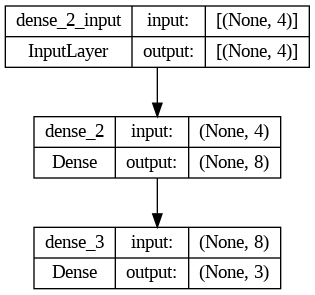

In [13]:
# Визуализация модели
#from keras.utils.vis_utils import plot_model

tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


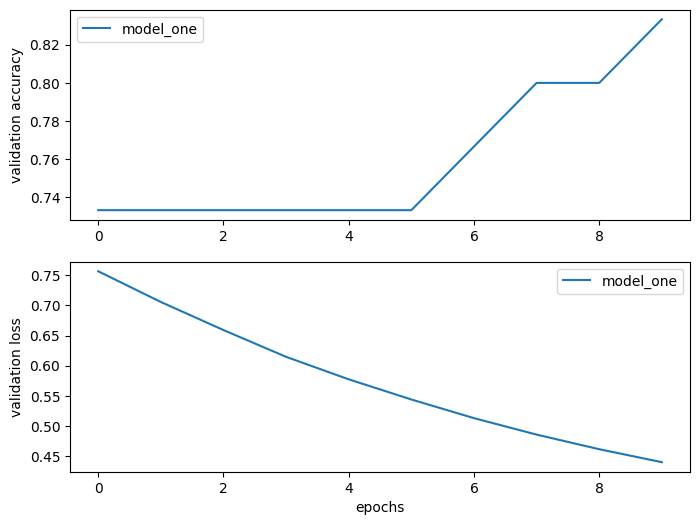

In [14]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

val_accurady = history_callback.history['val_accuracy']
val_loss = history_callback.history['val_loss']
ax1.plot(val_accurady, label=name)
ax2.plot(val_loss, label=name)

ax1.set_ylabel('validation accuracy')
ax2.set_ylabel('validation loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend();

# ROC кривая

Кривая ошибок или ROC-кривая – графичекая характеристика качества бинарного классификатора, зависимость доли верных положительных классификаций от доли ложных положительных классификаций при варьировании порога решающего правила. Преимуществом ROC-кривой является её инвариантность относительно отношения цены ошибки I и II рода.

Ошибка первого рода (𝛼-ошибка, ложноположительное заключение) — ситуация, когда отвергнута верная нулевая гипотеза (об отсутствии связи между явлениями или искомого эффекта).

Ошибка второго рода (β-ошибка, ложноотрицательное заключение) — ситуация, когда принята неверная нулевая гипотеза.

Задача классификации состоит в том, чтобы относить ранее неизвестные объекты к тому или иному классу. Примером такой задачи может быть диагностика болезни — заболел пациент (положительный результат) или нет (отрицательный результат). Тогда в результате классификации может наблюдаться четыре различных ситуации:

- истинно-положительный результат (true-positive, TP) — пациент больной, диагноз положительный;
- ложно-положительный результат (false-positive, FP) — пациент здоров, диагноз положительный;
- истинно-отрицательный результат (true-negative, TN) — пациент здоров, диагноз отрицательный;
- ложно-отрицательный результат (false-negative, FN) — пациент больной, диагноз отрицательный.

введем две метрики:

True positive rate: $TPR=\frac{TP}{TP+FN}$

False positive rate: $FPR=\frac {FP}{TN+FP}$.

TPR полностью совпадает с полнотой, и показывает долю верно предсказанных классов у объектов, относящихся к положительному классу.

FPR — это доля неправильно предсказанных классов среди объектов отрицательного класса.

Так как TPR и FPR считались для фиксированного порога $\mu \in [0,1]$ то их можно представить в виде функций от аргумента $\mu$:
$$TPR=TPR(\mu),FPR=FPR(\mu )$$.

При этом обе функции монотонно возрастают от 0 до 1, а значит определена функция:
$$ ROC=TPR(FPR)$$

(более формально:
$ROC(x)=TPR(FPR^{-1}(x)),x\in [0,1]$).

Площадь под ROC-кривой AUC (Area Under Curve) является агрегированной характеристикой качества классификации, не зависящей от соотношения цен ошибок. Чем больше значение AUC, тем «лучше» модель классификации. Данный показатель часто используется для сравнительного анализа нескольких моделей классификации.

1/1 [==============================] - 0s 90ms/step


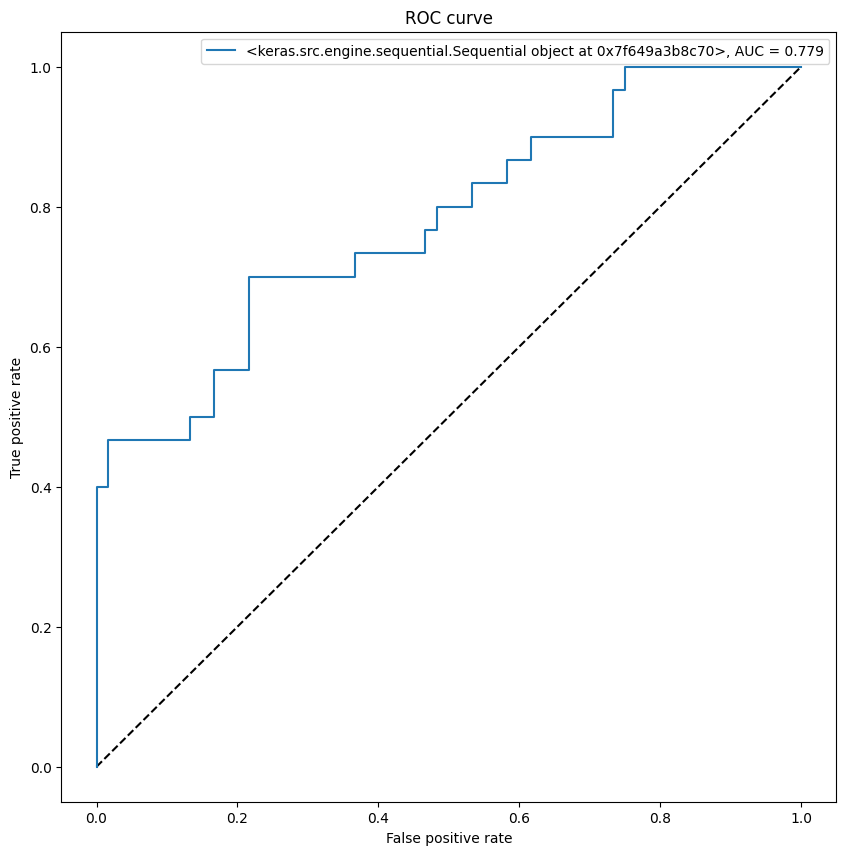

In [15]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')

Y_pred = model.predict(X_test)
fpr, tpr, threshold = roc_curve(Y_test.ravel(), Y_pred.ravel())

plt.plot(fpr, tpr, label='{}, AUC = {:.3f}'.format(model, auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend();